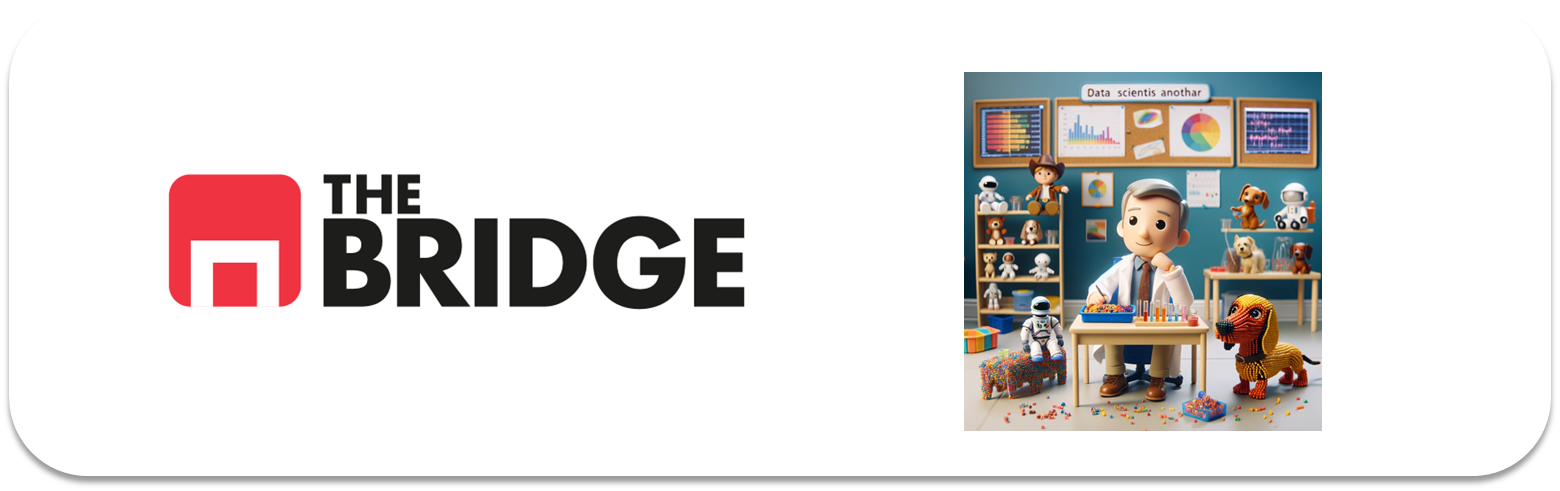

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [16]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [13]:
datasets = sns.get_dataset_names()
print(datasets) ### Datasets disponibles

### Carga del dataset

df_titanic = sns.load_dataset('titanic')
df_titanic.copy()



['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

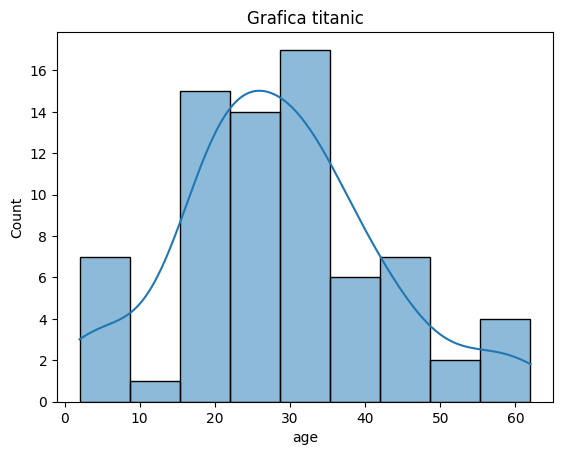

<Axes: >

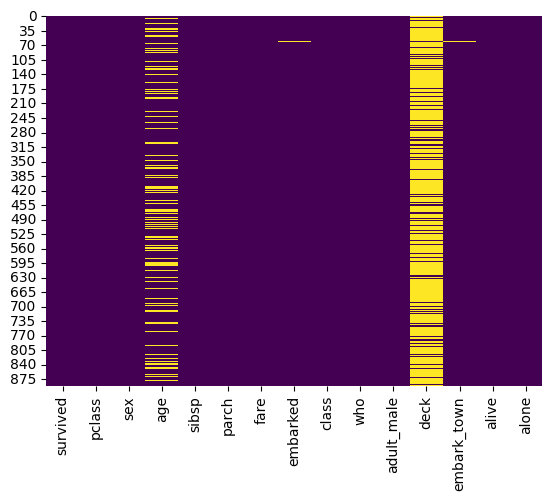

In [19]:
### Sacamos una muestra aleatoria de 100 personas de el DataFrame
sample_data = df_titanic.sample(n=100)
### Creamos la grafica gracias a matplotlib
sns.histplot(data=sample_data, x="age", kde=True)
plt.title("Grafica titanic")
plt.show()
### Miramos si hay nulos 
sns.heatmap(df_titanic.isnull(), cbar=False, cmap="viridis")

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [28]:
null_percentage = (df_titanic.isnull().sum() / len(df_titanic)) * 100
### Porcentaje de valores nulos por columna
null_percentage

### Elimino deck y elimino parch
if "parch" in df_titanic.columns:
    df_titanic.drop(columns=["parch"], inplace=True)
if "deck" in df_titanic.columns:
    df_titanic.drop(columns=["deck"], inplace= True)

df_titanic



,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Survived   | Indica si la persona supervivio o no |
| pclass | Clase en la que viajaba la persona |
| sex | Sexo de la persona |
| age | Edad de la persona |
| sibsp | Si la persona tenia familiares cercanos |
| fare | Precio por el billete |
| embarked | Ciudad donde se embarco |
| class | Clase del pasajero |
| who | Clasificacion segun genero y edad |
| adult_male | Indica si es hombre adulto |
| embark_town | Ciudad de embarque en texto |
| alive | si esta viva o no |
| alone | si viajaba sola o acompañada |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [29]:
### Reemplazar las iniciales por los nombres completos de las ciudades
df_titanic['embarked'] = df_titanic['embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})

### vemos si cambio
print(df_titanic['embarked'].value_counts())


embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [38]:
df_titanic = pd.read_csv("./data/Titanic.csv")

### Separar las variables categóricas y numéricas
categorical_vars = ["survived", "who", "class", "embarked", "alone"]
numerical_vars = ["age", "fare"]
### Configuración de gráficos
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8, 6)


### #2.1 Categóricas

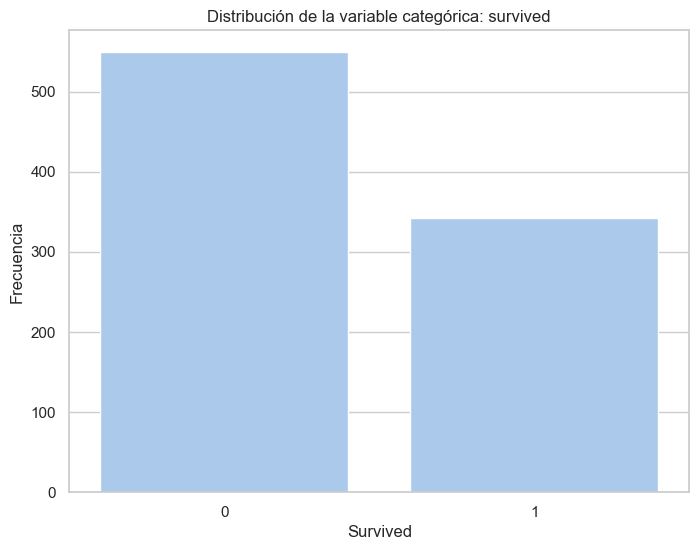

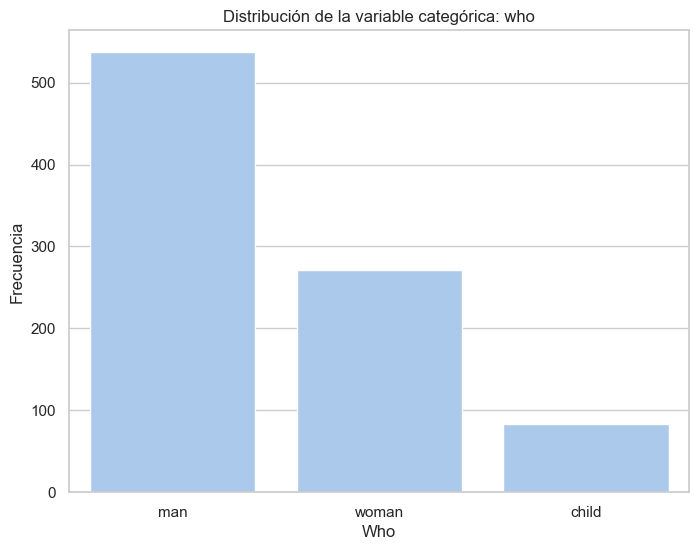

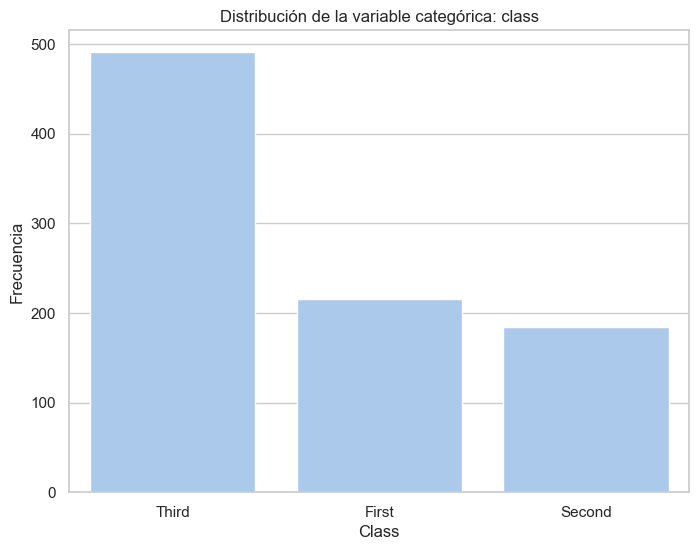

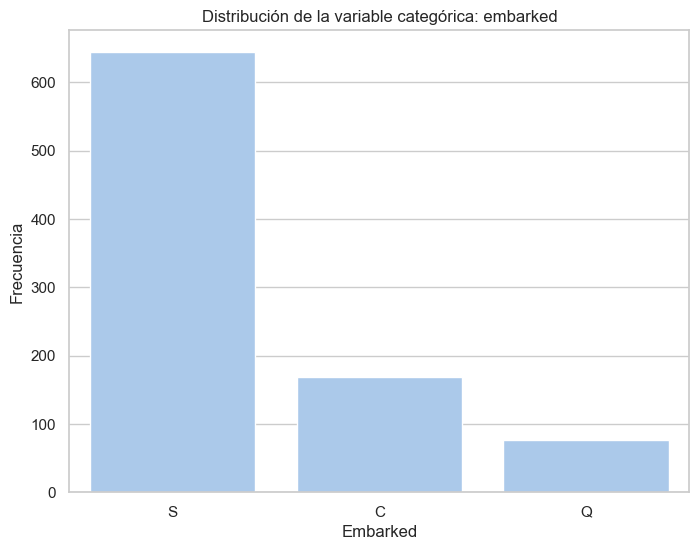

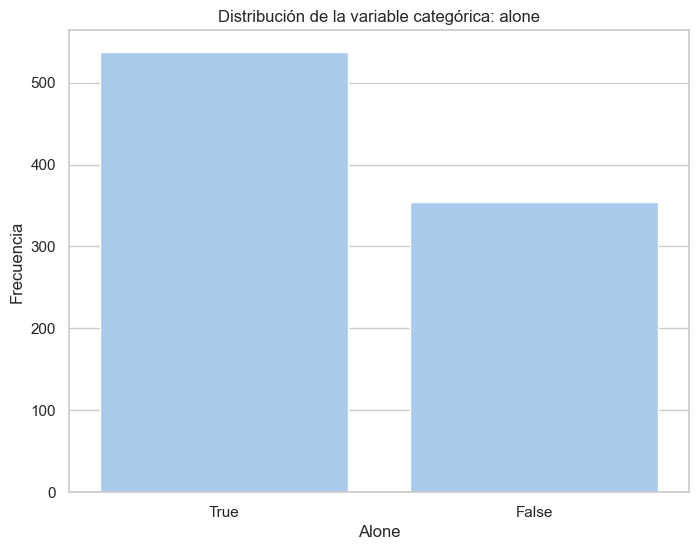

In [39]:
for var in categorical_vars:
        plt.figure()
        sns.countplot(data=df_titanic, x=var, order=df_titanic[var].value_counts().index)
        plt.title(f"Distribución de la variable categórica: {var}")
        plt.xlabel(var.capitalize())
        plt.ylabel("Frecuencia")
        plt.show()

### #2.2 Numéricas

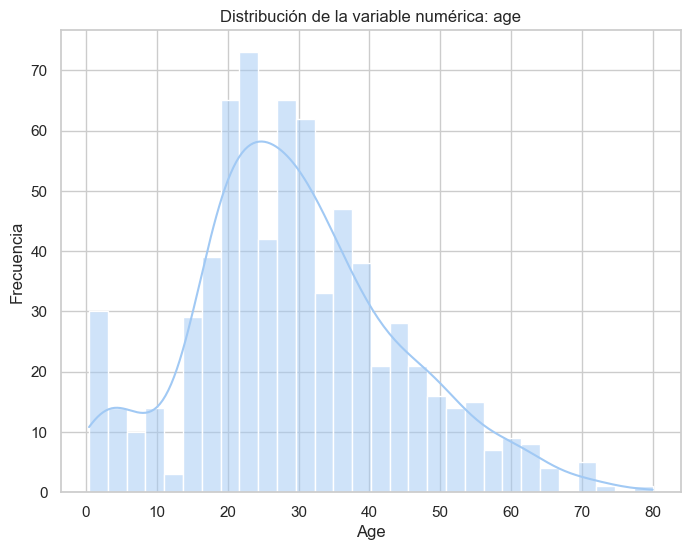

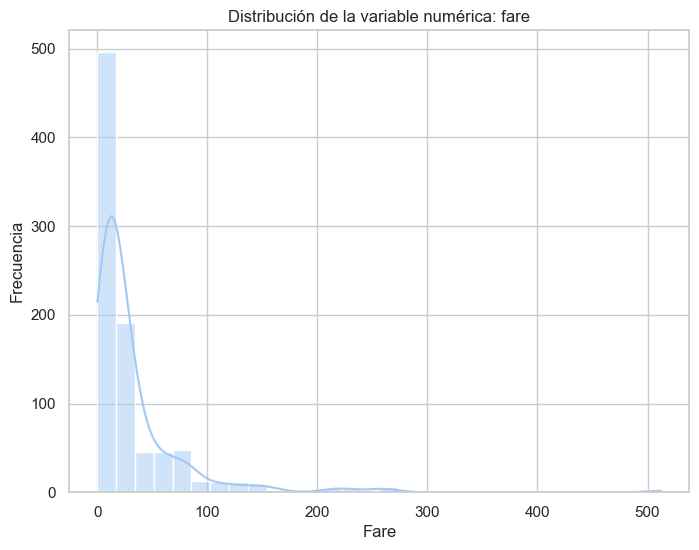

In [40]:
for var in numerical_vars:
    plt.figure()
    sns.histplot(df_titanic[var], kde=True, bins=30)
    plt.title(f"Distribución de la variable numérica: {var}")
    plt.xlabel(var.capitalize())
    plt.ylabel("Frecuencia")
    plt.show()


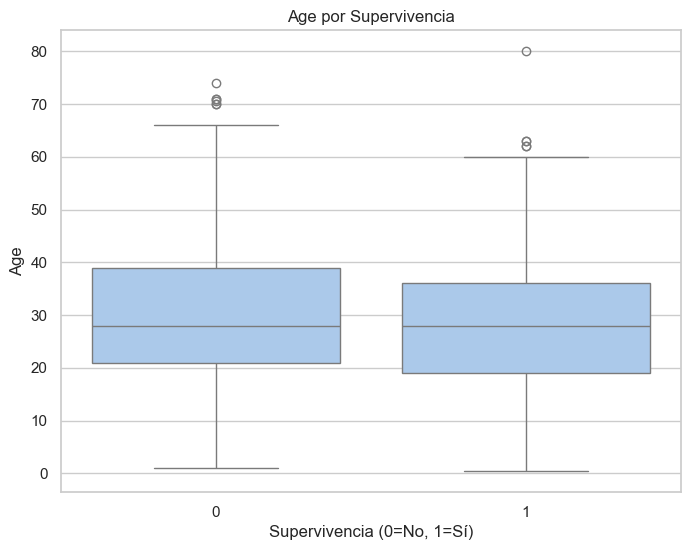

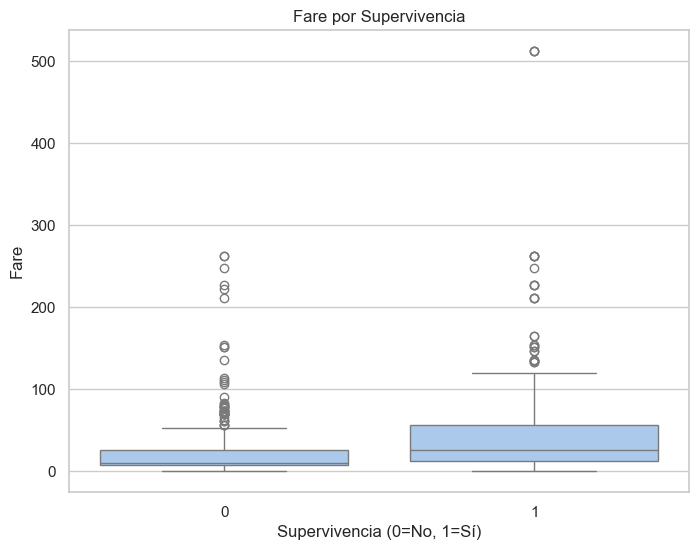

In [41]:
# Boxplots para numéricas vs supervivencia
for var in numerical_vars:
    plt.figure()
    sns.boxplot(data=df_titanic, x="survived", y=var)
    plt.title(f"{var.capitalize()} por Supervivencia")
    plt.xlabel("Supervivencia (0=No, 1=Sí)")
    plt.ylabel(var.capitalize())
    plt.show()

1. **Survived**: Aproximadamente el 38% de los pasajeros sobrevivieron al naufragio.
2. **Who**: La mayoría de los pasajeros eran hombres adultos.
3. **Class**: La clase más común fue la tercera, aunque la supervivencia varía significativamente según la clase.
4. **Embarked**: La mayoría de los pasajeros embarcaron en Southampton.
5. **Alone**: Aproximadamente la mitad de los pasajeros viajaba sola.

#######################################################################################################################################################
1. **Age**: La mayoría de los pasajeros tenían entre 20 y 40 años, aunque había un rango amplio que incluye niños y personas mayores.
2. **Fare**: Los precios de los boletos varían significativamente, con la mayoría de los pasajeros pagando menos de 50 libras.
######################################################################################################################################################

1. Hay diferencias notables en la supervivencia según la clase y el género (quienes eran mujeres y niños tenían más probabilidades de sobrevivir).
2. Las variables numéricas (edad y tarifa) también tienen una relación interesante con la supervivencia, lo que indica patrones socioeconómicos y de vulnerabilidad.